<a href="https://colab.research.google.com/github/uttkarsh05/StartingWithPython-ai1-fall2019/blob/master/mnist_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [4]:
!pip install wandb

In [6]:
# from lukas/mlclass
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils
from wandb.keras import WandbCallback
import wandb
import os



Using TensorFlow backend.


In [15]:
run = wandb.init()

## Config

In [0]:
# 
config = run.config
# class Config:
#   pass
# config = Config()
config.first_layer_convs = 32
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3
config.dropout = 0.2
config.dense_layer_size = 100
config.img_width = 28
config.img_height = 28
config.epochs = 30

## Setup

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.



In [20]:
X_train.shape, y_test.shape

((60000, 28, 28), (10000,))

In [21]:
# reshape input data
X_train = X_train.reshape(
    X_train.shape[0], config.img_width, config.img_height, 1)
#it creates one channel
X_test = X_test.reshape(
    X_test.shape[0], config.img_width, config.img_height, 1)

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
num_classes = y_test.shape[1]
labels = range(10)

(60000, 10)


## Model Building

In [22]:
# build model
model = Sequential()
model.add(Conv2D(32,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#takes max of 4 blocks
#13*13*32
#26*26*32
#model.add(Dropout(0.4))
model.add(Conv2D(64,
                 (3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#11*11*64
model.add(Dropout(0.4))
#6*6*64
model.add(Flatten())
#do it normally like simple mnist
model.add(Dense(config.dense_layer_size, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [23]:
%%wandb
## Model Running
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs,
          callbacks=[WandbCallback(data_type="image", save_model=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
  736/60000 [..............................] - ETA: 1:22 - loss: 2.0729 - acc: 0.2527

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.428762). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.215098). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 16s 272us/step - loss: 0.2174 - acc: 0.9325 - val_loss: 0.0471 - val_acc: 0.9845
Epoch 2/30
60000/60000 [==============================] - 16s 260us/step - loss: 0.0878 - acc: 0.9730 - val_loss: 0.0433 - val_acc: 0.9867
Epoch 3/30
60000/60000 [==============================] - 16s 261us/step - loss: 0.0670 - acc: 0.9790 - val_loss: 0.0319 - val_acc: 0.9901
Epoch 4/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.0593 - acc: 0.9821 - val_loss: 0.0294 - val_acc: 0.9899
Epoch 5/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.0506 - acc: 0.9842 - val_loss: 0.0247 - val_acc: 0.9919
Epoch 6/30
60000/60000 [==============================] - 16s 267us/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0230 - val_acc: 0.9930
Epoch 7/30
60000/60000 [==============================] - 16s 263us/step - loss: 0.0429 - acc: 0.9868 - val_loss: 0.0231 - val_acc: 0.9928
Epoch 8/30
60000/60000 [==============

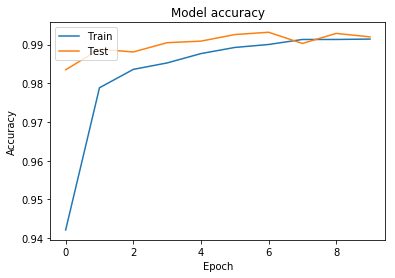

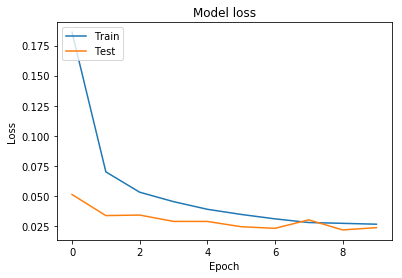

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()